# Circuit with PB

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import PlackettBurman, DOE
from doe_modules.plot import bio_multicomp
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import AbstractSimulator, Circuit, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = PlackettBurman
    simulator: AbstractSimulator = Circuit
    run_names: list = None
    preffix: str = ""
    suffix: str = "_circuit"

conf = Config()

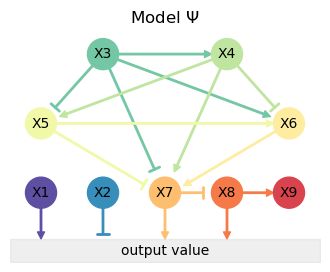

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

model = conf.simulator()
model.plot(ax=ax)
ax.set_title(model.name);

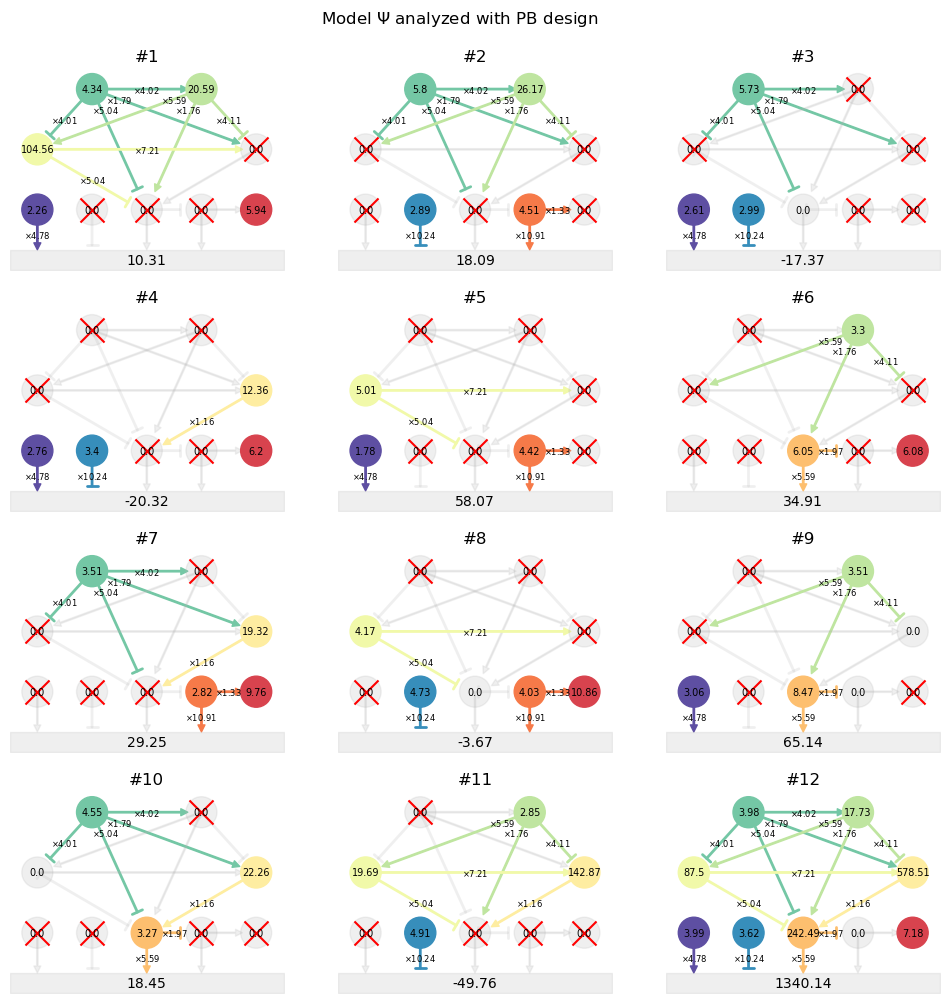

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model.simulate(
    design=conf.design, plot=True, ax=ax,
    titles=conf.run_names
)

fig.suptitle(f"{model.name} analyzed with {model.design().name} design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim{conf.suffix}", **kwarg_savefig)

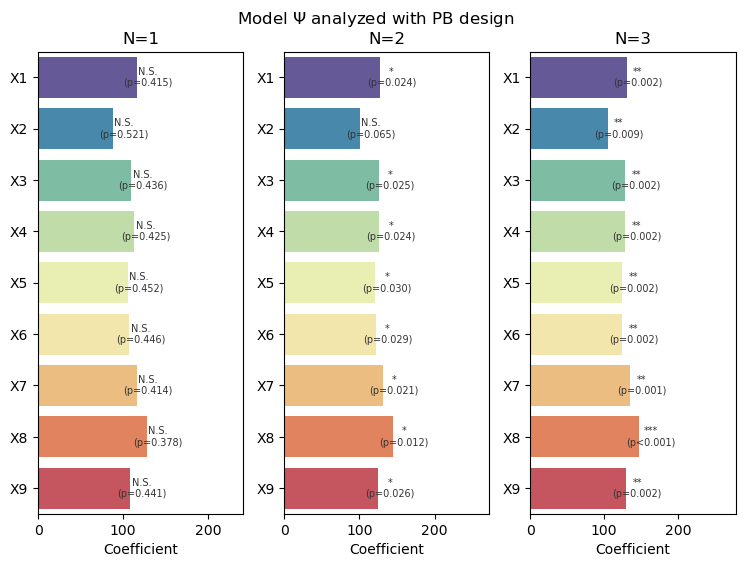

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, anova=True)

fig.suptitle(f"{model.name} analyzed with {model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr{conf.suffix}", **kwarg_savefig)

In [13]:
hoge = np.array([
    [1, 2],
    [3, 4]
])

moge = np.array([
    [1, 2],
    [1.001, 2.001]
])

In [14]:
np.linalg.det(hoge)

-2.0000000000000004

In [20]:
np.linalg.det(moge)

-0.0009999999999998554

In [22]:
np.linalg.det(np.linalg.inv(hoge.T @ hoge))

0.2500000000000022

In [21]:
np.linalg.det(np.linalg.inv(moge.T @ moge))

999999.9948784466

In [19]:
np.linalg.inv(moge.T @ moge)

array([[ 8004000.98366118, -4003000.99182855],
       [-4003000.99182855,  2002000.99591325]])